In [1]:
%reset -f
from pythonrc import *

# Simple test

## Setup the environment and the configuration

In [2]:
def initialize_allocator(
    allocator_type: skadipy.allocator.AllocatorBase, **kwargs
) -> skadipy.allocator.AllocatorBase:
    return allocator_type(
        actuators=[
            tunnel,
            voithschneider_port,
            voithschneider_starboard,
        ],
        force_torque_components=[
            skadipy.allocator.ForceTorqueComponent.X,
            skadipy.allocator.ForceTorqueComponent.Y,
            skadipy.allocator.ForceTorqueComponent.N,
        ],
        **kwargs,
    )


time_step=0.1

gamma = [1e-1, 1e-3, 1e-5]
mu    = [1e-1, 1e-1, 1e-1]
rho   = [1e-1, 1e-1, 1e-1]

def initialize_allocators():
    a = []
    for i in range(3):
        a.append(
            initialize_allocator(
                skadipy.allocator.reference_filters.MinimumMagnitudeAndAzimuth,
                gamma=gamma[i], mu=mu[i], rho=rho[i], time_step=time_step,
            )
        )
    return a



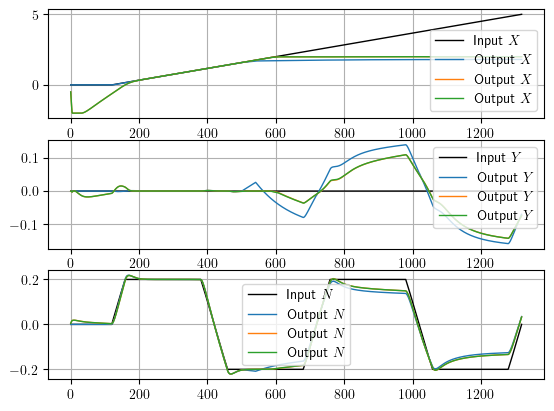

In [3]:
n = 1200
tau_cmd = np.zeros((n, 6))
tau_cmd[:,0] = np.linspace(0, 5, n)
tau_cmd[:,5] = gen_clipped_sin(n, 0.5, 2.0, 0.0, 0, -0.2, 0.2)
tau_cmd = np.concatenate((np.zeros((int(n/10), 6)), tau_cmd))

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

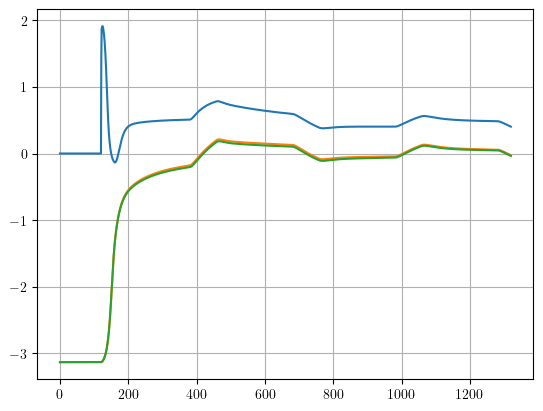

In [4]:
angles = []
for xi in xi_hist:
    a = np.empty((len(xi), 2))
    for i, u in enumerate(xi):
        a2 = np.arctan2(u[2], u[1])
        a3 = np.arctan2(u[4], u[3])
        a[i] = np.array([a2])
    angles.append(a)

plt.clf()
for i, angle in enumerate(angles):

    plt.plot(np.unwrap(angle[:,0]))
    pass


plt.grid(True)

In [5]:
# scipy.io.savemat(
#     'result_1.mat',
#     {
#         "inputs": tau,
#         "xi": control_inputs,
#         "outputs": outputs,
#         "rho": rho,
#         "mu": mu,
#         "gamma": gamma,
#         "attributes": extra_attributes
#     }
# )